In [3]:
!pip install scikit-image

     --------------------------------------- 23.9/23.9 MB 11.3 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 11.1 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 11.3 MB/s eta 0:00:00
     --------------------------------------- 38.6/38.6 MB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 11.0 MB/s eta 0:00:00
     -------------------------------------- 219.4/219.4 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [4]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray

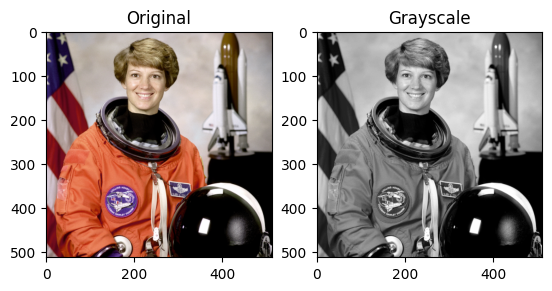

In [6]:
original = data.astronaut()
grayscale = rgb2gray(original)

plt.subplot(121)
plt.imshow(original)
plt.title('Original')
plt.subplot(122)
plt.imshow(grayscale, cmap=plt.cm.gray)
plt.title('Grayscale')
plt.show()

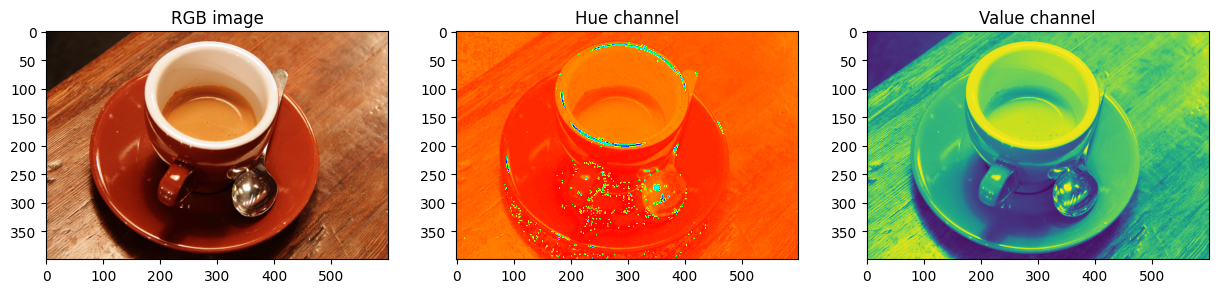

In [10]:
from skimage.color import rgb2hsv

rgb_img = data.coffee()
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

plt.figure(figsize=(15, 10))
plt.subplot(131)
plt.imshow(rgb_img)
plt.title('RGB image')
plt.subplot(132)
plt.imshow(hue_img, cmap='hsv')
plt.title('Hue channel')
plt.subplot(133)
plt.imshow(value_img)
plt.title('Value channel')

plt.show()

## Можно установить трешхолд на цветовой тон и, таким образом, выделить предмет на изображении

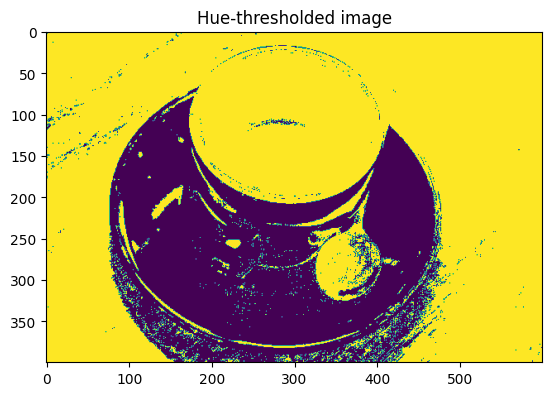

In [16]:
hue_threshhold = 0.04
binary_img = hue_img > hue_threshhold

plt.imshow(binary_img)
plt.title('Hue-thresholded image')

plt.show()

Text(0.5, 1.0, 'Matched')

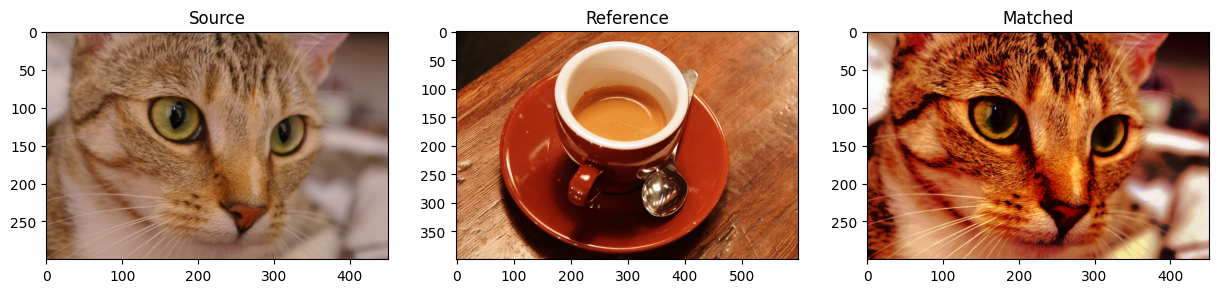

In [23]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import  exposure
from skimage.exposure import match_histograms

reference = data.coffee()
image = data.chelsea()

matched = match_histograms(image, reference, channel_axis=2)

plt.figure(figsize=(15, 10))
plt.subplot(131)
plt.imshow(image)
plt.title('Source')
plt.subplot(132)
plt.imshow(reference)
plt.title('Reference')
plt.subplot(133)
plt.imshow(matched)
plt.title('Matched')

## Можно разделить различные типы тканей на изображении

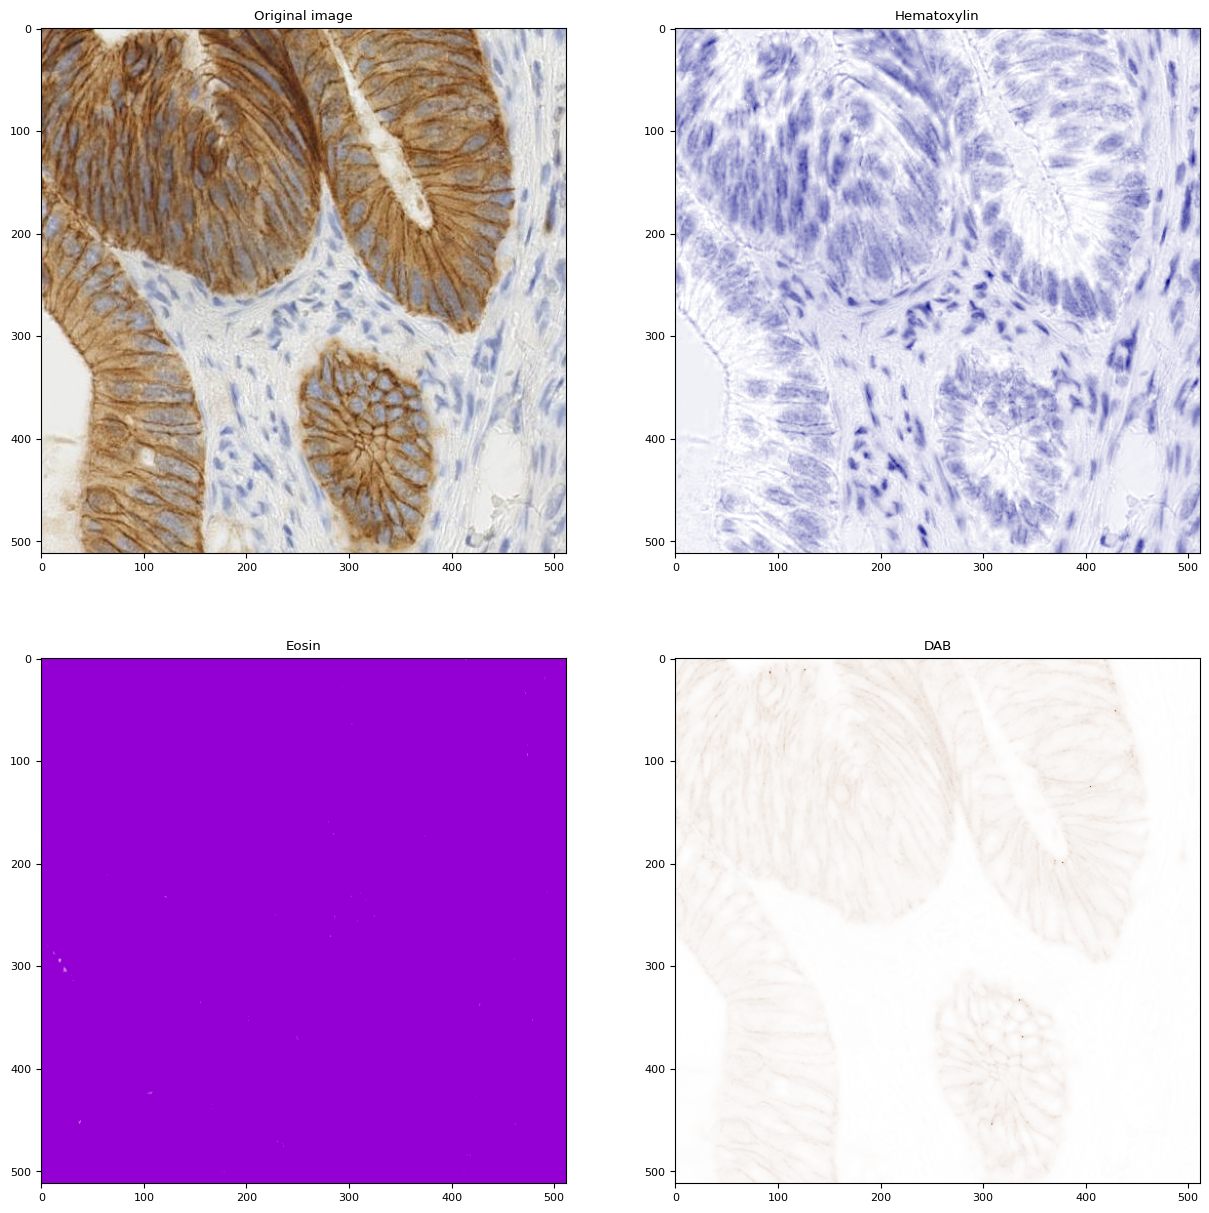

In [35]:
from skimage import data
from skimage.color import rgb2hed
from matplotlib.colors import LinearSegmentedColormap

# Create an artificial color close to the original one
cmap_hema = LinearSegmentedColormap.from_list('mycmap', ['white', 'navy'])
cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white', 'saddlebrown'])
cmap_eosin = LinearSegmentedColormap.from_list('mycmap', ['darkviolet', 'white'])

ihc_rgb = data.immunohistochemistry()
ihc_hed= rgb2hed(ihc_rgb)

plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(ihc_rgb)
plt.title('Original image')

plt.subplot(222)
plt.imshow(ihc_hed[:, :, 0], cmap=cmap_hema)
plt.title('Hematoxylin')

plt.subplot(223)
plt.imshow(ihc_hed[:, :, 1], cmap=cmap_eosin)
plt.title('Eosin')

plt.subplot(224)
plt.imshow(ihc_hed[:, :, 2], cmap=cmap_dab)
plt.title('DAB')

plt.show()

## Способы улучшения контрастности

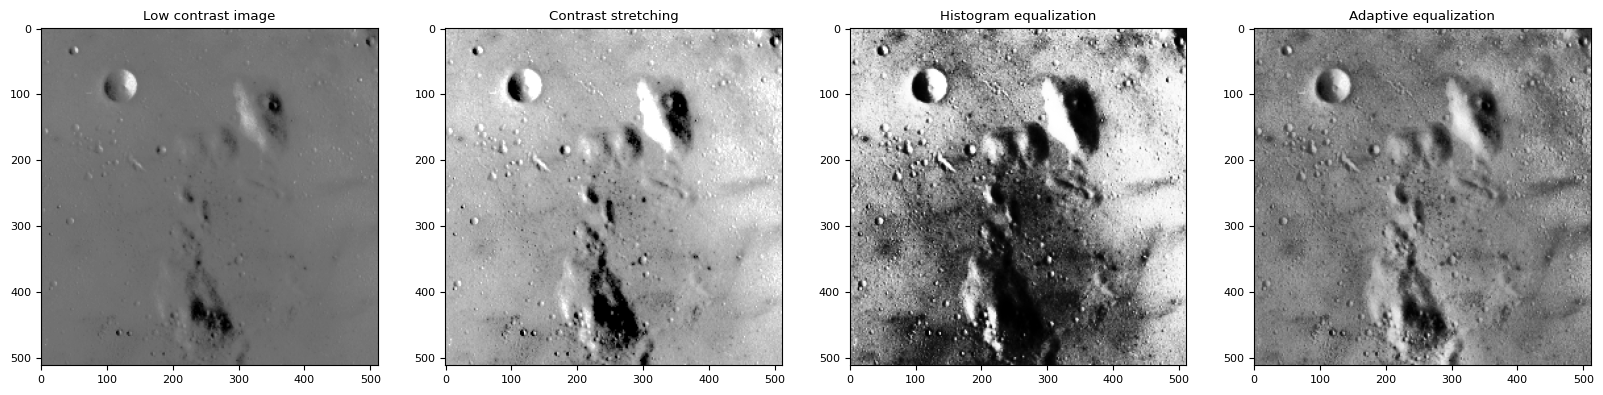

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

matplotlib.rcParams['font.size'] = 8

img = data.moon()

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
plt.figure(figsize=(20, 10))

plt.subplot(141)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Low contrast image')

plt.subplot(142)
plt.imshow(img_rescale, cmap=plt.cm.gray)
plt.title('Contrast stretching')

plt.subplot(143)
plt.imshow(img_eq, cmap=plt.cm.gray)
plt.title('Histogram equalization')

plt.subplot(144)
plt.imshow(img_adapteq, cmap=plt.cm.gray)
plt.title('Adaptive equalization')

plt.show()

## Детектор границ

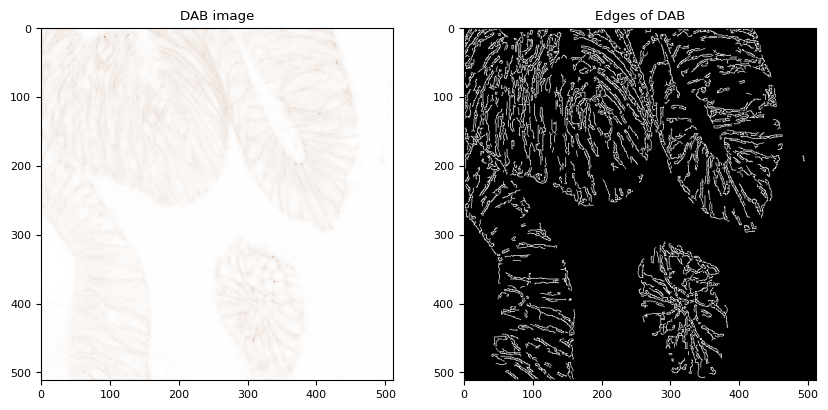

In [33]:
from skimage import feature

edges_dab = feature.canny(ihc_hed[:, :, 2], sigma=0.4)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(ihc_hed[:, :, 2], cmap_dab)
plt.title('DAB image')
plt.subplot(122)
plt.imshow(edges_dab, cmap=plt.cm.gray)
plt.title('Edges of DAB')
plt.show()

## Сохранение изображения с помощью matplotlib

In [39]:
plt.imsave('mask_image.jpg', edges_dab)